<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/07_Simple_and_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries 

from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["HOUSEPRICE"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Dataset overall Information
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  HOUSEPRICE  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Let set the BASE MODEL on which we will improve

# Assigning Independent and Dependent variables
dependent_variable = boston_pd[['HOUSEPRICE']]
print("DEPENDENT VARIABLE : ",dependent_variable.columns)
independent_variables = boston_pd[boston_pd.columns[0:12]]
print("INDEPENDENT VARIABLES : ")
print(independent_variables.columns)

DEPENDENT VARIABLE :  Index(['HOUSEPRICE'], dtype='object')
INDEPENDENT VARIABLES : 
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')


In [5]:
# Base Model

import statsmodels.api as sm
from statsmodels.api import OLS
OLS(dependent_variable, independent_variables).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              846.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   2.38e-320
Time:                        16:05:54   Log-Likelihood:                         -1556.1
No. Observations:                 506   AIC:                                      3136.
Df Residuals:                     494   BIC:                                      3187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Output Explaination 

# Omnibus/Prob(Omnibus) - 
# A test of the skewness and kurtosis of the residual.
# We hope to see a value close to zero which would indicate normalcy. 
# The Prob (Omnibus) indicates the probability that the residuals are normally distributed. 
# We hope to see something close to 1 here. 
# In this case Omnibus = 277 (way higher than 1) and Prob(Omnibus) = 0 
# Which is way high (normally = 1) and the Prob (Omnibus) is 0 which is way too low
# so the data is not normal, not ideal. 

# Skew - 
# Measure of data symmetry.
# We want to see something close to zero, indicating the residual distribution is normal. 
# Note that this value also drives the Omnibus
# In this case, Skewness = 2.148, way higher than 0 so error/residual is skewwed

# Kurtosis - 
# Measure of "peakiness", or curvature of the data. 
# Kurtosis of the normal distribution is 3.0.
# In this case, Kurtosis = 14 which is way too higher

# Durbin-Watson - 
# Tests for homoscedasticity
# We hope to have a value between 1 and 2. 
# In this case, Durbin-Watson = 0.927 is close, but within limits.

# Jarque-Bera (JB)/Prob(JB) - 
# like the Omnibus test in that it tests both skew and kurtosis. 
# It is also performed for the distribution analysis of the regression errors.
# A large value of JB test indicates that the errors are not normally distributed.
# In this case, JB = 3084 which is way too higher so error are not normally distributed

# Condition Number -
# This test measures the sensitivity of a function's output as compared to its input 
# When we have multicollinearity, we can expect much higher fluctuations to small changes in the data,
# hence, we hope to see a relatively small number, something below 30. 
# In this case, Condition Number = well above 30, so multicollinearity present

# R Square and Adjusted R Square - 
# Both measures model performance and Possible values range from 0.0 to 1.0. 
# The Adjusted R Squared value is always a bit lower than the Multiple R-Squared value 
# Adjusted R Square consequently is a more accurate measure of model performance.
# Adding an additional explanatory variable to the model will likely 
# increase the Multiple R-Squared value, but decrease the Adjusted R-Squared value
# Adjusted R Square will only increase when good variables are added in the model
# Higher the Adjusted R Square, better is the model
# In this case, Adjusted R Square = 0.95 which is good for the model

# F Statistics and Prob(F Statistics) - 
# This test for overall significance has the following two hypothesis:
# Null hypothesis : Model with no independent variables fits the data as well as your model.
# Alternative hypothesis : Model fits the data better than the intercept-only model.
# In this case, P(F-Statistics) = less than 0.05 suggests Independent variables are important

# P Value - 
# If the p-value for a variable is less than your significance level (0.05)
# sample data provide enough evidence to reject the null hypothesis for the entire population.
# Null hypothesis that the variable has no correlation with the dependent variable. 
# If No correlation, no association between the changes in the independent & dependent variable.
# In this case, Remove all variables with P values greater than 0.05

# Log-Likelihood, AIC and BIC are for LOGISTIC REGRESSION MODEL

In [7]:
# Let test the Base Model

# Dividing Data into training and test set
from sklearn.model_selection import train_test_split 
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7)
print("Training Data Shape :", data_train.shape)
print("Training House Price Shape :", house_price_train.shape)
print("Test Data Shape :",data_test.shape)
print("Test House Price Shape :",house_price_test.shape)

Training Data Shape : (354, 12)
Training House Price Shape : (354, 1)
Test Data Shape : (152, 12)
Test House Price Shape : (152, 1)


In [8]:
# Base Model
Model_1 = OLS(house_price_train,data_train).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              617.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   1.78e-223
Time:                        16:05:54   Log-Likelihood:                         -1081.9
No. Observations:                 354   AIC:                                      2188.
Df Residuals:                     342   BIC:                                      2234.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1602      0.040     -4.013      0.000      -0.239      -0.082
ZN             0.0393      0.018      2.240      0.026       0.005       0.074
INDUS         -0.0297      0.080     -0.369      0.712      -0.188       0.129
CHAS           4.2805      1.184      3.616      0.000       1.952       6.609
NOX          -11.6281      3.967     -2.931      0.004     -19.431      -3.825
RM             7.3931      0.357     20.736      0.000       6.692       8.094
AGE           -0.0596      0.016     -3.684      0.000      -0.091      -0.028
DIS           -1.4192      0.242     -5.874      0.000      -1.894      -0.944
RAD            0.1694      0.085      1.983      0.048       0.001       0.337
TAX           -0.0070      0.005     -1.416      0.158      -0.017       0.003
PTRATIO       -0.6843      0.127     -5.388      0.000      -0.934      -0.435
B              0.0169      0.004      4.795      0.000       0.010       0.024
==============================================================================
Omnibus:                      207.336   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2395.019
Skew:                           2.223   Prob(JB):                         0.00
Kurtosis:                      14.942   Cond. No.                     7.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Base Model Test and Metrics

from sklearn import metrics
Prediction_1 = Model_1.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_1).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_1).round(2))

# MAE is Absolute difference between the Model Predictions & True(Actual) values
# MSE is Square difference between Model Predictions & True values
# MSE affected by Outliers, because we Square the distance
# RMSE, square root(MSE) therefore cancelling the affect the square 
# MAE value can range from 0 to infinity, difficult to interpret
# MAPE is equivalent to MAE but provide the error in a percentage(0-100)

# MAPE = 49.65,average difference between predicted & actual is 49.7% which is very high

Mean Absolute Error : 3.55
Mean Squared Error : 30.67
Root Mean Squared Error : 30.67
Mean Absolute Percentage Error : 50.68


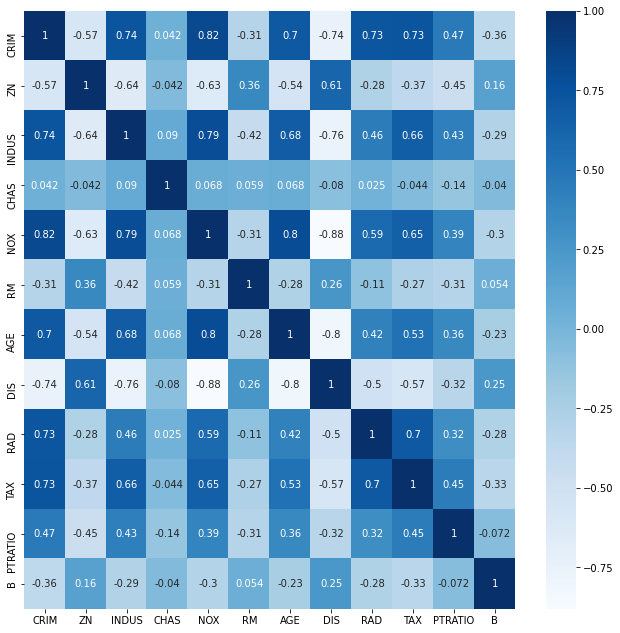

In [10]:
# Model 2, let do some data cleaning

# Increasing the size of the plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) # Sample figsize in inches, change the number accordingly
sns.heatmap(independent_variables.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# Inference : 
# Lots of High Correlation Values

In [11]:
# Filtering Highly Positive or Negative Correlated Values

# Create correlation matrix
corr_matrix = independent_variables.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44


In [12]:
# Find index of feature columns with correlation greater than 0.75
Pos_corr_var=np.where(corr_matrix > 0.75)
Pos_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Pos_corr_var) if x!=y and x<y]
print("Highly Positive Related (> 0.75) : ")
print(Pos_corr_var)

# Find index of feature columns with correlation less than - 0.75
Neg_corr_var=np.where(corr_matrix < -0.75)
Neg_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Neg_corr_var) if x!=y and x<y]
print("Highly Negatively Related (< - 0.75) : ")
print(Neg_corr_var)

# Inference : 
# Remove 'INDUS' / 'NOX', 'RAD'/'TAX , 'NOX'/'DIS'
# Removing NOX
independent_variables = independent_variables.drop(['NOX'], axis = 1)

# Now out of 'RAD' & 'TAX' which one to remove ? VIF

Highly Positive Related (> 0.75) : 
[('INDUS', 'NOX'), ('RAD', 'TAX')]
Highly Negatively Related (< - 0.75) : 
[('NOX', 'DIS')]


In [13]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

calc_vif(independent_variables).sort_values("VIF")

# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 20 indicates high multicollinearity between this independent variable and the others

# Inference : 
# Remove 'RM','TAX' and 'PTRATIO'

independent_variables = independent_variables.drop(['RM', 'TAX', 'PTRATIO'], axis = 1) 

Quantile Distribution
           CRIM
0.00   0.006320
0.10   0.038195
0.20   0.064170
0.30   0.099245
0.40   0.150380
0.50   0.256510
0.60   0.550070
0.70   1.728440
0.80   5.581070
0.90  10.753000
0.95  15.789150
1.00  88.976200


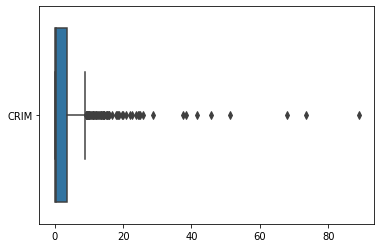

In [14]:
# Now check Outlier in the data
# Column Wise Checking

# CRIM Column
print("Quantile Distribution")
print(pd.DataFrame(independent_variables['CRIM'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['CRIM'])

# Inference : 
# Capping to 95% Datapoints
independent_variables['CRIM'] = np.where(independent_variables['CRIM'].round(1) > 15.0, 15.0, independent_variables['CRIM'])

Quantile Distribution
         ZN
0.00    0.0
0.10    0.0
0.20    0.0
0.30    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.70    0.0
0.80   20.0
0.90   42.5
0.95   80.0
1.00  100.0


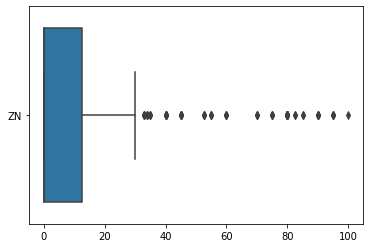

In [15]:
# ZN Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['ZN'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['ZN'])

# Inference : 
# Most Values (70%) data points are zero. So lets not do any capping !!

Quantile Distribution
      INDUS
0.00   0.46
0.10   2.91
0.20   4.39
0.30   5.96
0.40   7.38
0.50   9.69
0.60  12.83
0.70  18.10
0.80  18.10
0.90  19.58
0.95  21.89
1.00  27.74


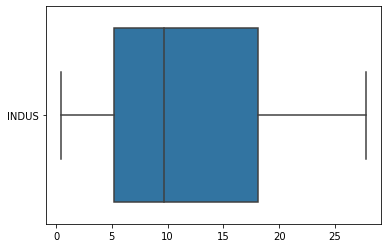

In [16]:
# CRIM Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['INDUS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['INDUS'])

# Inference : NO OUTLIERS

Quantile Distribution
      CHAS
0.00   0.0
0.10   0.0
0.20   0.0
0.30   0.0
0.40   0.0
0.50   0.0
0.60   0.0
0.70   0.0
0.80   0.0
0.90   0.0
0.95   1.0
1.00   1.0


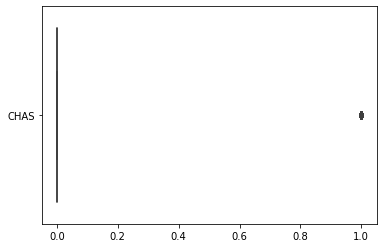

In [17]:
# CHAS Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['CHAS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['CHAS'])

# Inference : 
# 90% of Data is 0. So lets drop the variable
independent_variables = independent_variables.drop(['CHAS'], axis = 1)

Quantile Distribution
         AGE
0.00    2.90
0.10   26.95
0.20   37.80
0.30   52.40
0.40   65.40
0.50   77.50
0.60   85.90
0.70   91.80
0.80   95.60
0.90   98.80
0.95  100.00
1.00  100.00


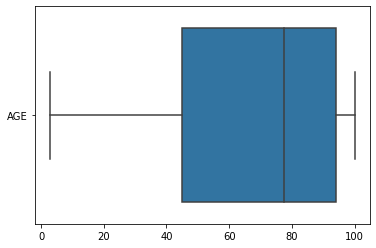

In [18]:
# AGE Column 

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['AGE'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['AGE'])

# Inference : NO OUTLIERS

Quantile Distribution
           DIS
0.00   1.12960
0.10   1.62830
0.20   1.95120
0.30   2.25965
0.40   2.64030
0.50   3.20745
0.60   3.87500
0.70   4.54040
0.80   5.61500
0.90   6.81660
0.95   7.82780
1.00  12.12650


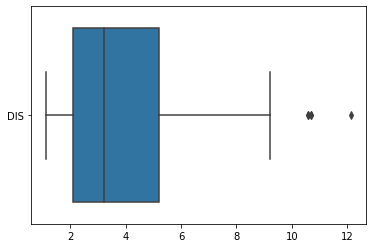

In [19]:
# DIS Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['DIS'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['DIS'])

# Inference : 
# Capping to 95% Datapoints
independent_variables['DIS'] = np.where(independent_variables['DIS'].round(1) > 7.0, 7.0, independent_variables['DIS'])

Quantile Distribution
       RAD
0.00   1.0
0.10   3.0
0.20   4.0
0.30   4.0
0.40   5.0
0.50   5.0
0.60   5.0
0.70   8.0
0.80  24.0
0.90  24.0
0.95  24.0
1.00  24.0


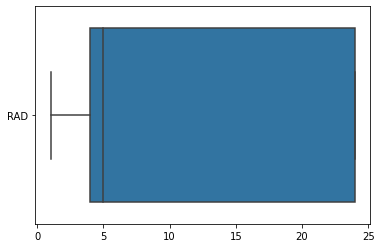

In [20]:
# RAD Column 

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['RAD'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['RAD'])

# Inference : NO OUTLIERS

Quantile Distribution
            B
0.00    0.320
0.10  290.270
0.20  364.310
0.30  378.665
0.40  387.970
0.50  391.440
0.60  393.530
0.70  395.465
0.80  396.900
0.90  396.900
0.95  396.900
1.00  396.900


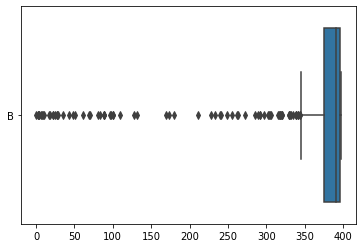

In [21]:
# B Column

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['B'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['B'])

# Inference : 
# Capping to first 10% Datapoints
independent_variables['B'] = np.where(independent_variables['B'].round(1) < 290.0, 290.0, independent_variables['B'])

In [22]:
# Lets check Skewness in the Data
# If Skewness = 0, data is perfectly symmetrical
# If Skewness is less than -1 or greater +1, distribution is highly skewed
# If Skewness is between -1 and -0.5 or between 0.5 and 1, distribution is moderately skewed
# If Skewness is between -0.5 and 0.5 then it is approximately symmetric  

pd.DataFrame(independent_variables.skew().round(2),columns = ["Skewness"])

# Inference : Positive Skew - 'CRIM','ZN' & Negative Skew - 'B'

,Skewness
CRIM,1.71
ZN,2.23
INDUS,0.30
AGE,-0.60
DIS,0.55
RAD,1.00
B,-1.76


In [23]:
# Lets remove Skewness one by one

# CRIM Variable
# Log Transformation
CRIM_Log = np.log(independent_variables['CRIM'])

# Square Root Transformation
CRIM_sqrt = np.sqrt(independent_variables['CRIM'])

# Cube Root Transformation
CRIM_cbrt = np.cbrt(independent_variables['CRIM'])

# Box Cox Transformation
from scipy import stats
CRIM_BoxCox = stats.boxcox(independent_variables['CRIM'])[0]
Variable = pd.Series(CRIM_BoxCox)

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['CRIM'].skew(),CRIM_Log.skew(),CRIM_sqrt.skew(),CRIM_cbrt.skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns = ["Skewness"]))

# Inference : Best transformations is Log Transformation (Near to 0)

independent_variables['CRIM_Log'] = CRIM_Log

Comparing all Skewness values
             Skewness
Normal       1.705324
Log          0.321681
Square Root  1.168043
Cube Root    0.935891
Box Cox      0.083939


In [24]:
# ZN Variable

# Log Transformation
ZN_Log = np.log(independent_variables['ZN'])

# Square Root Transformation
ZN_sqrt = np.sqrt(independent_variables['ZN'])

# Cube Root Transformation
ZN_cbrt = np.cbrt(independent_variables['ZN'])

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['ZN'].skew(),ZN_Log.skew(),ZN_sqrt.skew(),ZN_cbrt.skew()],
             index=['Normal','Log','Square Root','Cube Root'],
             columns = ["Skewness"]))

# Inference : Best transformations is Cube Transformation (Near to 0)

independent_variables['ZN_Cbrt'] = ZN_cbrt

Comparing all Skewness values
             Skewness
Normal       2.225666
Log               NaN
Square Root  1.476293
Cube Root    1.262563


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
# B Variable

# Log Transformation
B_Log = np.log(independent_variables['B'])

# Square Root Transformation
B_sqrt = np.sqrt(independent_variables['B'])

# Cube Root Transformation
B_cbrt = np.cbrt(independent_variables['B'])

# Box Cox Transformation
from scipy import stats
B_BoxCox = stats.boxcox(independent_variables['B'])[0]
Variable = pd.Series(B_BoxCox)

print("Comparing all Skewness values")
print(pd.DataFrame([independent_variables['B'].skew(),B_Log.skew(),B_sqrt.skew(),B_cbrt.skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns = ["Skewness"]))

# Inference : Best transformations is Box Cox Transformation (Approx to zero)
# But avoiding Box Cox because it give values e raise to, second best is Square Root Transformation
independent_variables['B_Sqrt'] = B_sqrt

Comparing all Skewness values
             Skewness
Normal      -1.760681
Log         -1.837693
Square Root -1.799513
Cube Root   -1.812319
Box Cox     -0.867610


In [26]:
# Removing variables (raw variables) which are transformed

# Removing variables
independent_variables = independent_variables.drop(['CRIM', 'ZN', 'B'], axis = 1)

# Round to 2 decimal point
independent_variables = independent_variables.round(2)
independent_variables.head()

,INDUS,AGE,DIS,RAD,CRIM_Log,ZN_Cbrt,B_Sqrt
0,2.31,65.2,4.09,1.0,-5.06,2.62,19.92
1,7.07,78.9,4.97,2.0,-3.60,0.00,19.92
2,7.07,61.1,4.97,2.0,-3.60,0.00,19.82
3,2.18,45.8,6.06,3.0,-3.43,0.00,19.87
4,2.18,54.2,6.06,3.0,-2.67,0.00,19.92


In [27]:
# Now lets train the model

# Splitting Data into 70:30
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7)

# Fitting the model
Model_2 = OLS(house_price_train,data_train).fit()
Model_2.summary()

# Inference : 
# R and Ajusted R Square decreased (Model 1 = 0.95, Model 2 = 0.90). Ideal close to 1
# Prob(F) less than 0.05 so independent var are important (Model 1 & Model 2 same result)
# Omnibus,decreased good sign (Model 1 = 277, Model 2 = 114). Ideal close to 1
# Durbin Watson,DW = 2 not bad (Model 1 = 0.9, Model 2 = 2). Ideal is from 0 to 1
# JB decrease good amount, good sign error normally distributed (Model 1 = 3084, Model 2 = 324)
# Skewness decreased good sign (Model 1 = 2.1, Model 2 = 1.5). Ideal is -1 to 1
# Kurtosis decreased godo sign (Model 1 = 14, Model 2 = 6.5). Ideal is 3
# Condition Number, well above 30 (Model 1 = 8000, Model 2 = 104). Ideal less than 30

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              470.7
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   6.92e-173
Time:                        16:05:57   Log-Likelihood:                         -1220.8
No. Observations:                 354   AIC:                                      2456.
Df Residuals:                     347   BIC:                                      2483.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS         -0.4244      0.093     -4.546      0.000      -0.608      -0.241
AGE           -0.0758      0.023     -3.329      0.001      -0.121      -0.031
DIS           -2.5119      0.410     -6.124      0.000      -3.319      -1.705
RAD           -0.1976      0.093     -2.119      0.035      -0.381      -0.014
CRIM_Log       0.0076      0.498      0.015      0.988      -0.972       0.987
ZN_Cbrt        1.4722      0.382      3.858      0.000       0.722       2.223
B_Sqrt         2.1908      0.162     13.519      0.000       1.872       2.510
==============================================================================
Omnibus:                      126.999   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.558
Skew:                           1.656   Prob(JB):                     1.89e-84
Kurtosis:                       6.894   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Prediction of Model 2 
Prediction_2 = Model_2.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_2).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_2).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_2).round(2))
print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_2).round(2))

# Inference : 
# Model 1 MAPE = 49.7% decreased to 43.6% in Model 2. Good Progress !!

Mean Absolute Error : 5.32
Mean Squared Error : 49.36
Root Mean Squared Error : 49.36
Mean Absolute Percentage Error : 49.37


In [29]:
# Model 3

# Now lets drop variable based on P Values
independent_variables = independent_variables.drop(['RAD', 'CRIM_Log'], axis = 1)

# Splitting Data into 70:30
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7)

# Fitting the model
Model_3 = OLS(house_price_train,data_train).fit()
Model_3.summary()

# Inference : 
# R and Ajusted R Square constant (Model 1 = 0.95, Model 2 = 0.90, Model 3 = 0.90). Ideal close to 1
# Prob(F) less than 0.05 so independent var are important (Model 1,2 & 3 same result)
# Omnibus,increased bad sign (Model 1 = 277, Model 2 = 114, Model 3 = 130). Ideal close to 1
# Durbin Watson,DW = 2 constant (Model 1 = 0.9, Model 2 = 2, Model 3 = 2). Ideal is from 0 to 1
# JB increased, bad sign (Model 1 = 3084, Model 2 = 324, Model 3 = 456)
# Skewness almost constant (Model 1 = 2.1, Model 2 = 1.5, Model 3 = 1.6). Ideal is -1 to 1
# Kurtosis increased bad sign (Model 1 = 14, Model 2 = 6.5, Model 3 = 8.2). Ideal is 3
# Condition Number, well above 30 (Model 1 = 8000, Model 2 = 104, Model 3 = 89). Ideal less than 30

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              697.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   3.01e-179
Time:                        16:05:57   Log-Likelihood:                         -1199.7
No. Observations:                 354   AIC:                                      2409.
Df Residuals:                     349   BIC:                                      2429.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS         -0.5792      0.083     -7.011      0.000      -0.742      -0.417
AGE           -0.0705      0.022     -3.201      0.001      -0.114      -0.027
DIS           -1.8500      0.397     -4.656      0.000      -2.632      -1.068
ZN_Cbrt        0.9226      0.346      2.665      0.008       0.242       1.604
B_Sqrt         2.0298      0.143     14.237      0.000       1.749       2.310
==============================================================================
Omnibus:                      144.050   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.477
Skew:                           1.761   Prob(JB):                    3.29e-127
Kurtosis:                       8.204   Cond. No.                         89.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Prediction of Model 3

Prediction_3 = Model_3.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_3).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_3).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_3).round(2))
print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_3).round(2))

# Inference : 
# Model 1 MAPE = 49.7% decreased to 43.6% in Model 2 and decreased to 41.1% in Model 3.
# Model 3 is performed well out of 3 models (Model 3 should be selected)

Mean Absolute Error : 5.69
Mean Squared Error : 69.36
Root Mean Squared Error : 69.36
Mean Absolute Percentage Error : 41.81
